In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

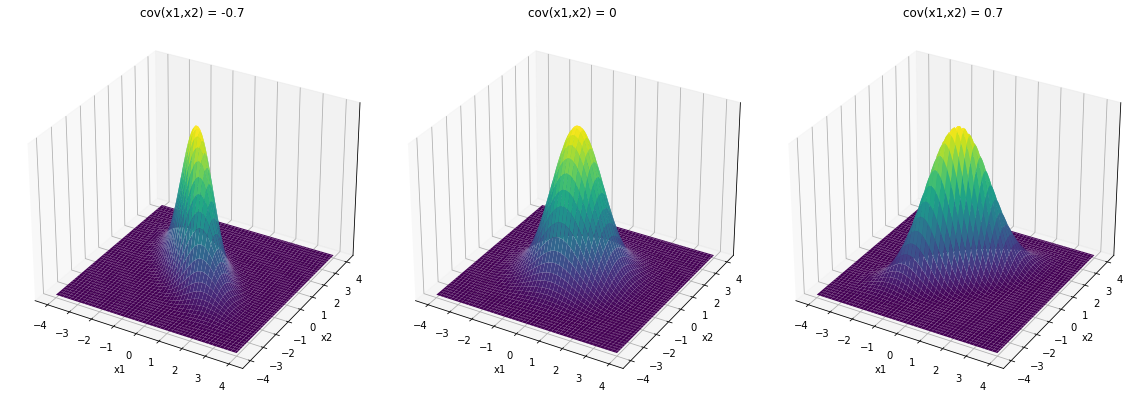

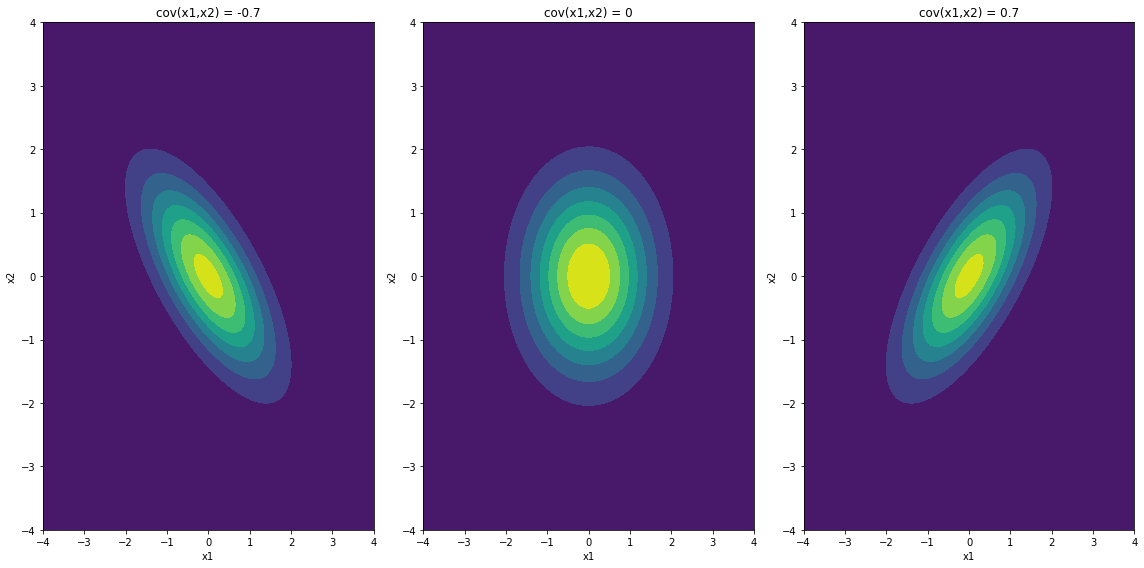

In [12]:
plt.rcParams['figure.figsize']=16,8
fig = plt.figure()

covValue = [-0.7, 0,0.7]

mean = np.array([0,0])
pdfArray = []

for idx, val in enumerate(covValue):
    cov = np.array([[1, val], [val, 1]])
    distr = multivariate_normal(cov = cov, mean = mean)
    
    mean1, mean2 = mean[0], mean[1]
    sigma1, sigma2 = cov[0,0], cov[1,1]
    
    x = np.linspace(-4*sigma1, 4*sigma1, num=100)
    y = np.linspace(-4*sigma2, 4*sigma2, num=100)
    x1, y1 = np.meshgrid(x,y)
    
    pdf = np.zeros(x1.shape)
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            pdf[i,j] = distr.pdf([x1[i,j], y1[i,j]])
            
    
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(x1, y1, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'cov(x1,x2) = {val}')
    pdfArray.append(pdf)
    ax.axes.zaxis.set_ticks([])
    
plt.tight_layout()
plt.show()

for idx, val in enumerate(pdfArray):
    plt.subplot(1,3,idx+1)
    plt.contourf(x1, y1, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'cov(x1,x2) = {covValue[idx]}')
plt.tight_layout()
plt.show()